In [28]:
import warnings
warnings.filterwarnings('ignore')

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
df=pd.read_csv("C:\\Users\\nurs\\OneDrive\\Рабочий стол\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Датасет: 7043 клиентов, 21 признак. Большинство признаков — категориальные.
Целевой признак — Churn (Yes/No).

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
df['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

Отток составляет около 27%, что означает дисбаланс классов. Это важно учитывать при обучении модели.

In [34]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [35]:
df['TotalCharges'].eq(' ').sum()

11

In [36]:
categorical_columns=df.select_dtypes(include='object').columns.tolist()
df[categorical_columns].nunique().sort_values()
for i in categorical_columns:
    print(f"{i}: {df[i].unique()}")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn: ['No' 'Yes']


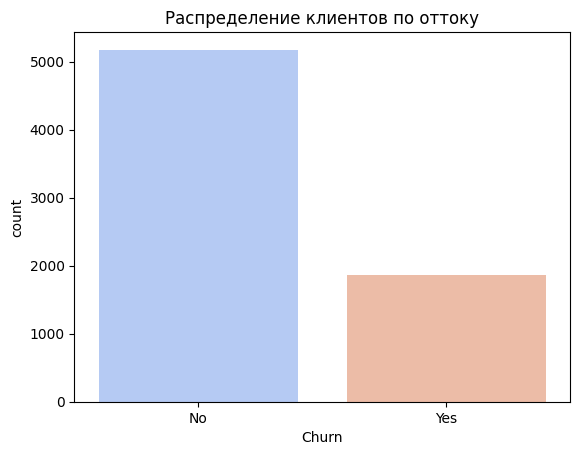

In [37]:
df=df.drop('customerID', axis=1)
sns.countplot(data=df, x='Churn', palette='coolwarm')
plt.title('Распределение клиентов по оттоку')
plt.show()

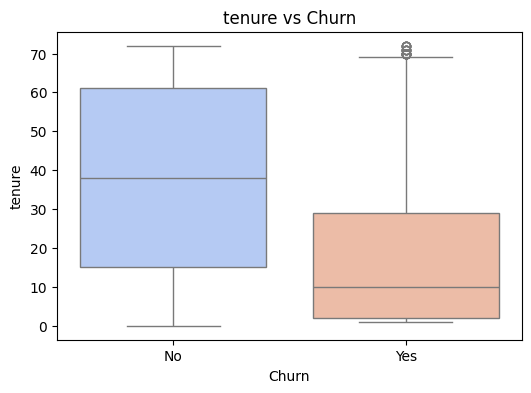

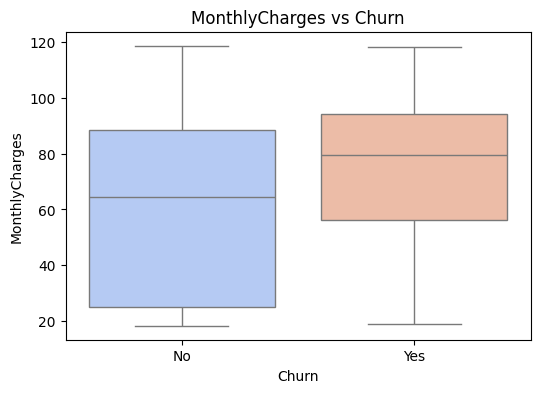

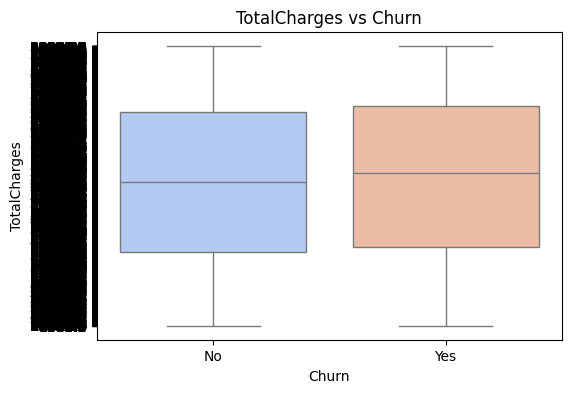

In [38]:
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']
for col in numerical_columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df, x='Churn', y=col, palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.show()

Числовые признаки

Клиенты, которые уходят, имеют очень маленький tenure — чаще всего они покидают сервис в первые месяцы.

У ушедших клиентов выше MonthlyCharges.

TotalCharges сильно связан с tenure (чем дольше клиент, тем больше он заплатил).

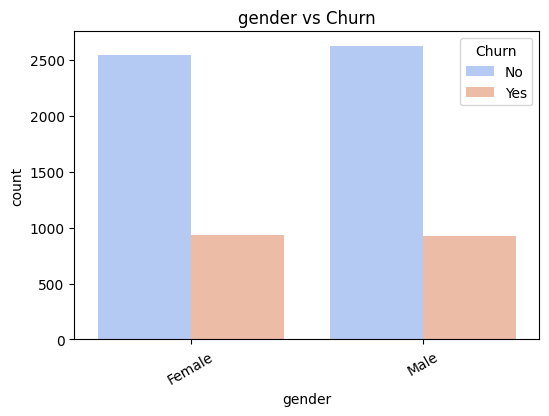

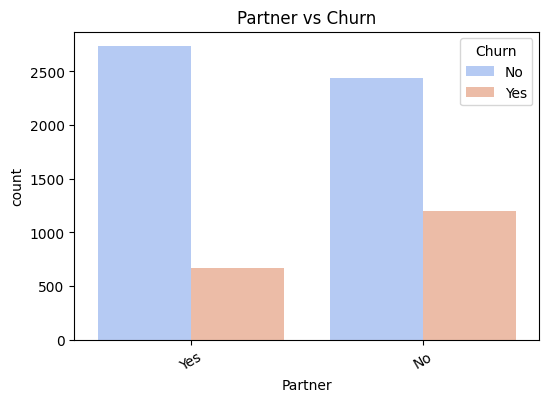

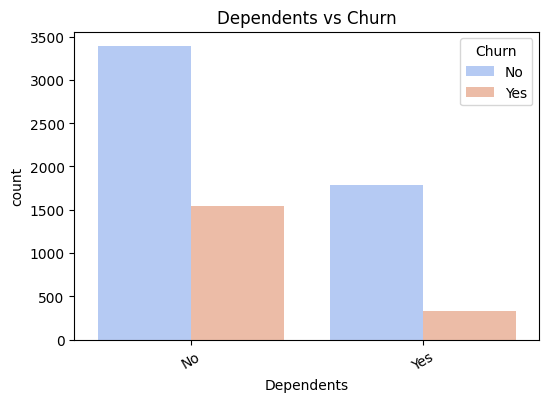

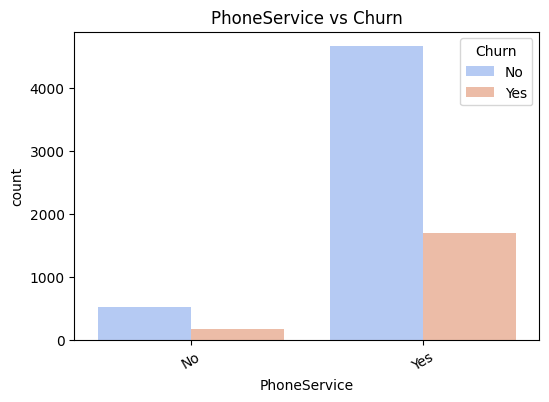

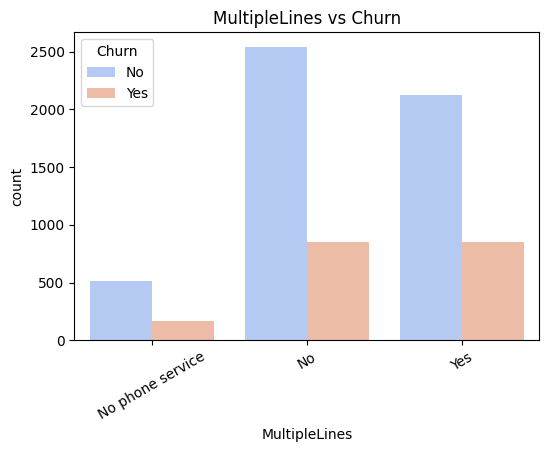

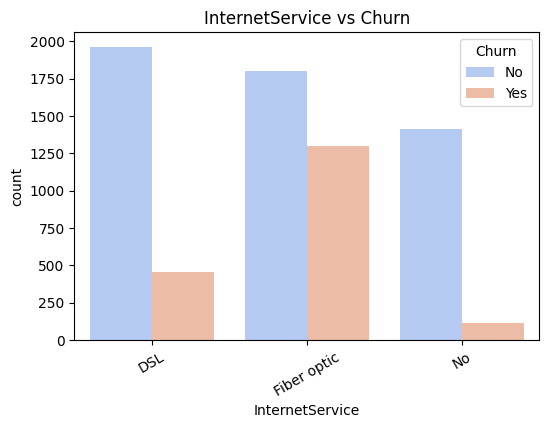

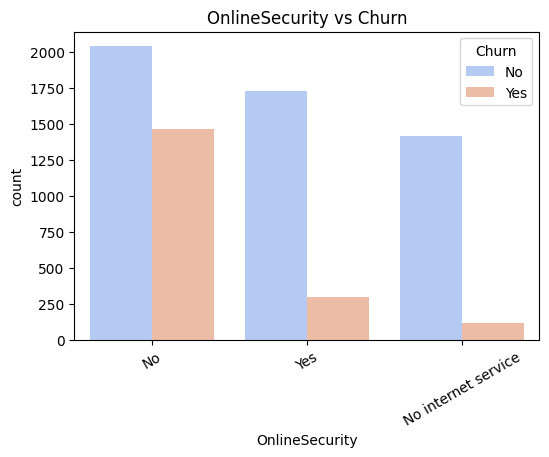

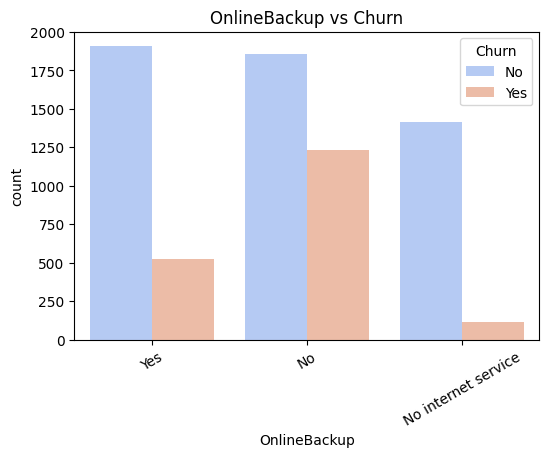

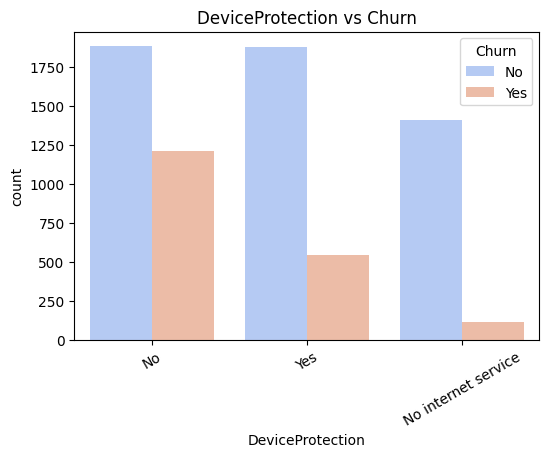

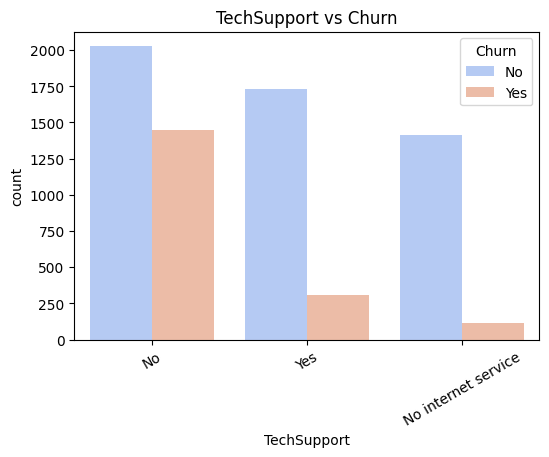

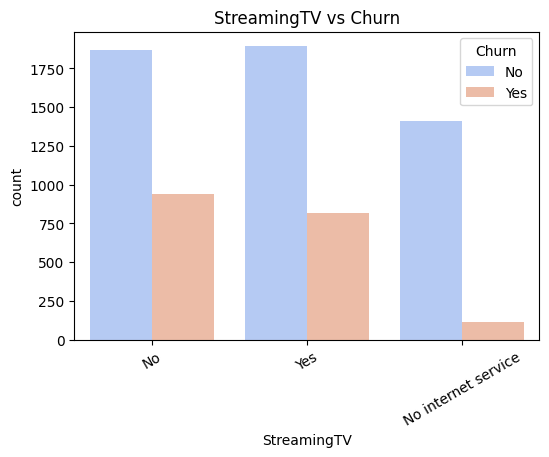

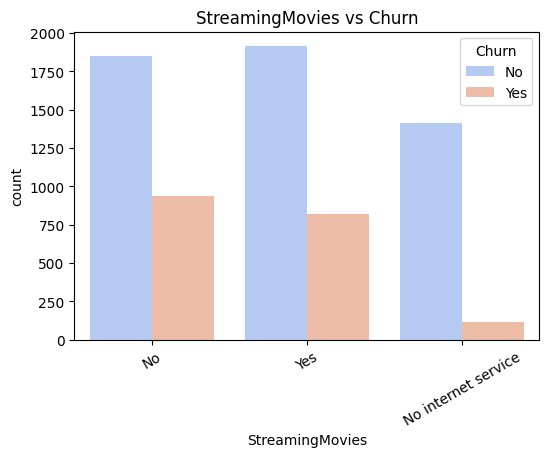

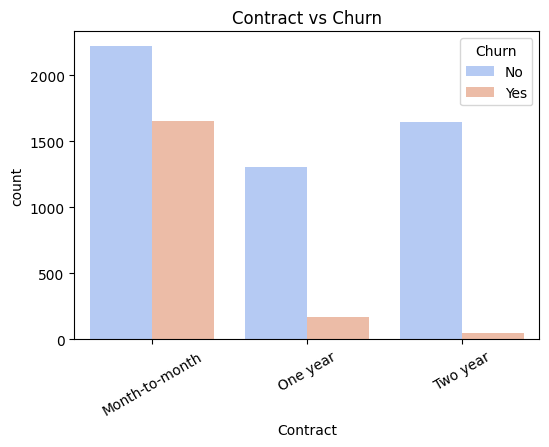

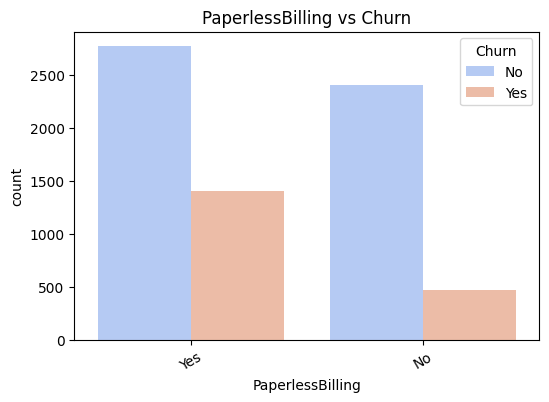

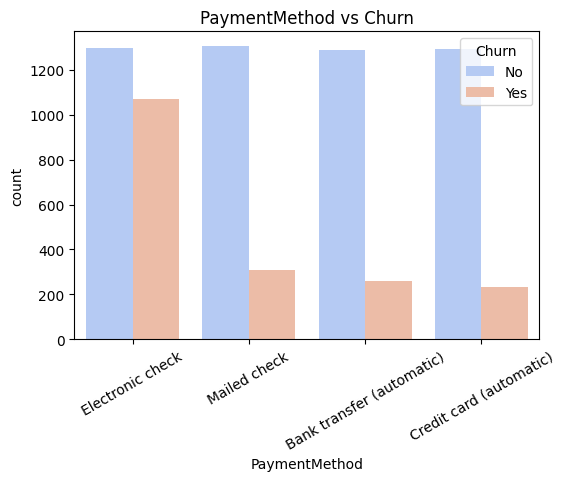

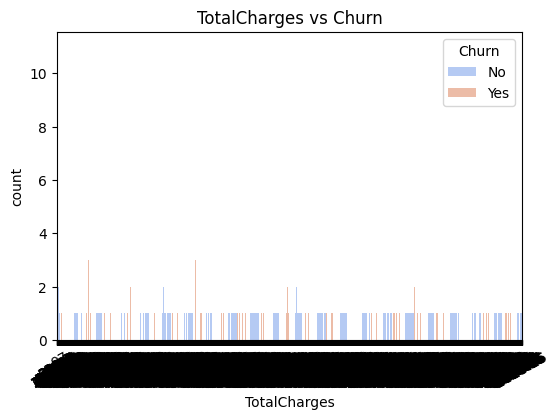

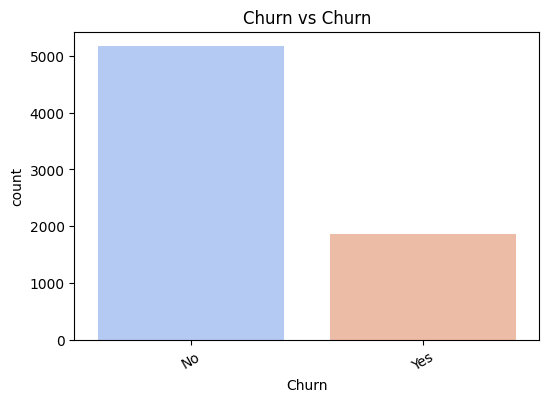

In [39]:
categorical_columns.remove('customerID')
for col in categorical_columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=col, hue='Churn', palette='coolwarm')
    plt.title(f'{col} vs Churn')
    plt.xticks(rotation=30)
    plt.show()

Влияние категориальных признаков

Contract — самый сильный фактор:

Month-to-month → высокий churn

One/Two year → низкий churn

PaymentMethod: Electronic check показывает самый высокий уровень оттока.

InternetService: клиенты с Fiber optic уходят чаще остальных.

OnlineSecurity, TechSupport, DeviceProtection: если услуги отсутствуют → вероятность ухода повышается.

Клиенты без партнёра и без детей уходят чаще.

Пол и PhoneService почти не влияют на churn.

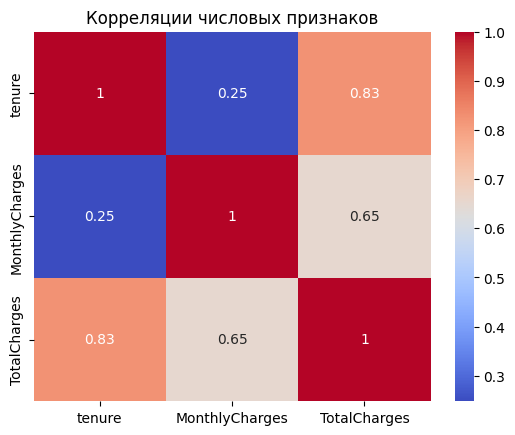

In [40]:
temp = df.copy()
temp['TotalCharges'] = pd.to_numeric(temp['TotalCharges'], errors='coerce')
sns.heatmap(temp[numerical_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Корреляции числовых признаков')
plt.show()